In [1]:
import pandas as pd
import numpy as np
import klib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\danie\Downloads\US_Accidents_March23.csv"

In [3]:
df =pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    start_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    print(f'Initial memory usage of dataframe is {start_mem:.2f} MB/{start_mem_GB:.2f} GB')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(index=True, deep=True).sum() / 1024**2
    end_mem_GB = df.memory_usage(index=True, deep=True).sum() / 1024**3
    reduction = 100 * (start_mem - end_mem) / start_mem
    print(f'Memory usage after optimization is: {end_mem:.2f} MB/{end_mem_GB:.2f} GB')
    print(f'Decreased by {reduction:.1f}%')
    
    return df

In [6]:
train = reduce_mem_usage(df)

Initial memory usage of dataframe is 10870.28 MB/10.62 GB
Memory usage after optimization is: 3582.58 MB/3.50 GB
Decreased by 67.0%


In [7]:
df = train

In [8]:
#Se escoger el estado con mayor numero de incidentes, esto debido a que el dataframe es muy extenso.
conteo= df["State"].value_counts()
print(conteo)

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: State, dtype: int64


Se evidencia que el estado con mayor numeros es California por lo que se seguira el ejercicio con este estado.

In [9]:
state='CA'

df_state=df.loc[df.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741433 entries, 728 to 7728393
Data columns (total 45 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     category
 1   Source                 category
 2   Severity               int8    
 3   Start_Time             category
 4   End_Time               category
 5   Start_Lat              float16 
 6   Start_Lng              float16 
 7   End_Lat                float16 
 8   End_Lng                float16 
 9   Distance(mi)           float16 
 10  Description            category
 11  Street                 category
 12  City                   category
 13  County                 category
 14  Zipcode                category
 15  Country                category
 16  Timezone               category
 17  Airport_Code           category
 18  Weather_Timestamp      category
 19  Temperature(F)         float16 
 20  Wind_Chill(F)          float16 
 21  Humidity(%)            float1

In [10]:
df =df_state

In [11]:
df = klib.data_cleaning(df)

Shape of cleaned data: (1741433, 43) - Remaining NAs: 2816193


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 2
     of which 2 single valued.     Columns: ['country', 'turning_loop']
Dropped missing values: 0
Reduced memory by at least: 82.77 MB (-6.44%)



In [12]:

df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')


df['Year'] = df['start_time'].dt.year
df['Month'] = df['start_time'].dt.month  # Changed to give numeric month
df['Day'] = df['start_time'].dt.day
df['Hour'] = df['start_time'].dt.hour
df['Weekday'] = df['start_time'].dt.weekday  # Changed to give numeric weekday (Monday=0, Sunday=6)


td = 'Duracion(min)'
df[td] = round((df['end_time'] - df['start_time']) / np.timedelta64(1, 'm'))


df.drop(["start_time", "end_time"], axis=1, inplace=True)


In [13]:
df = df[df["Year"] >= 2022]

In [14]:
#Revisamos si no hay duraciones de tiempo negativas
df[td][df[td]<=0]

Series([], Name: Duracion(min), dtype: float64)

In [15]:
#En caso de haber negativos se eliminan 
neg_outliers=df[td]<=0

# Los valores atipicos se convertiran en NAN
df[neg_outliers] = np.nan

df.dropna(subset=[td],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450472 entries, 175167 to 1111239
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     450472 non-null  category
 1   source                 450472 non-null  category
 2   severity               450472 non-null  float64 
 3   start_lat              450472 non-null  float16 
 4   start_lng              450472 non-null  float16 
 5   end_lat                413496 non-null  float16 
 6   end_lng                413496 non-null  float16 
 7   distance_mi            450472 non-null  float16 
 8   description            450472 non-null  category
 9   street                 448762 non-null  category
 10  city                   450469 non-null  category
 11  county                 450472 non-null  category
 12  zipcode                450335 non-null  category
 13  timezone               450335 non-null  category
 14  airport_code  

In [16]:
df.head()

,id,source,severity,start_lat,start_lng,end_lat,end_lng,distance_mi,description,street,...,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,Year,Month,Day,Hour,Weekday,Duracion(min)
175167,A-512231,Source2,1.0,34.53125,-117.9375,NaN,NaN,0.0,Crash on CA-138 Pearblossom Hwy at 96th St.,Pearblossom Hwy,...,Night,Night,Night,Night,2022.0,9.0,8.0,2.0,3.0,149.0
175168,A-512257,Source2,1.0,34.18750,-118.8750,NaN,NaN,0.0,Crash on US-101 Southbound before Exit 44 Moor...,US-101,...,Night,Night,Night,Night,2022.0,9.0,8.0,2.0,3.0,29.0
175169,A-512277,Source2,3.0,38.59375,-121.5000,NaN,NaN,0.0,#1 lane blocked due to crash on I-5 Northbound...,I-5,...,Night,Night,Night,Night,2022.0,9.0,7.0,21.0,2.0,44.0
175170,A-512340,Source2,2.0,33.84375,-117.8750,NaN,NaN,0.0,HOV lane blocked due to crash on CA-57 Southbo...,CA-57,...,Night,Night,Night,Night,2022.0,9.0,8.0,2.0,3.0,30.0
175171,A-512341,Source3,1.0,33.87500,-118.0000,NaN,NaN,0.0,Crash on Valley View Ave at I-5.,Firestone Blvd,...,Night,Night,Night,Night,2022.0,9.0,8.0,2.0,3.0,29.0


In [17]:
df.columns

Index(['id', 'source', 'severity', 'start_lat', 'start_lng', 'end_lat',
       'end_lng', 'distance_mi', 'description', 'street', 'city', 'county',
       'zipcode', 'timezone', 'airport_code', 'weather_timestamp',
       'temperature_f', 'wind_chill_f', 'humidity_percent', 'pressure_in',
       'visibility_mi', 'wind_direction', 'wind_speed_mph', 'precipitation_in',
       'weather_condition', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'sunrise_sunset', 'civil_twilight',
       'nautical_twilight', 'astronomical_twilight', 'Year', 'Month', 'Day',
       'Hour', 'Weekday', 'Duracion(min)'],
      dtype='object')

Se revisarán las columnas númericas, para hacer la selección e imputación correspondiente.

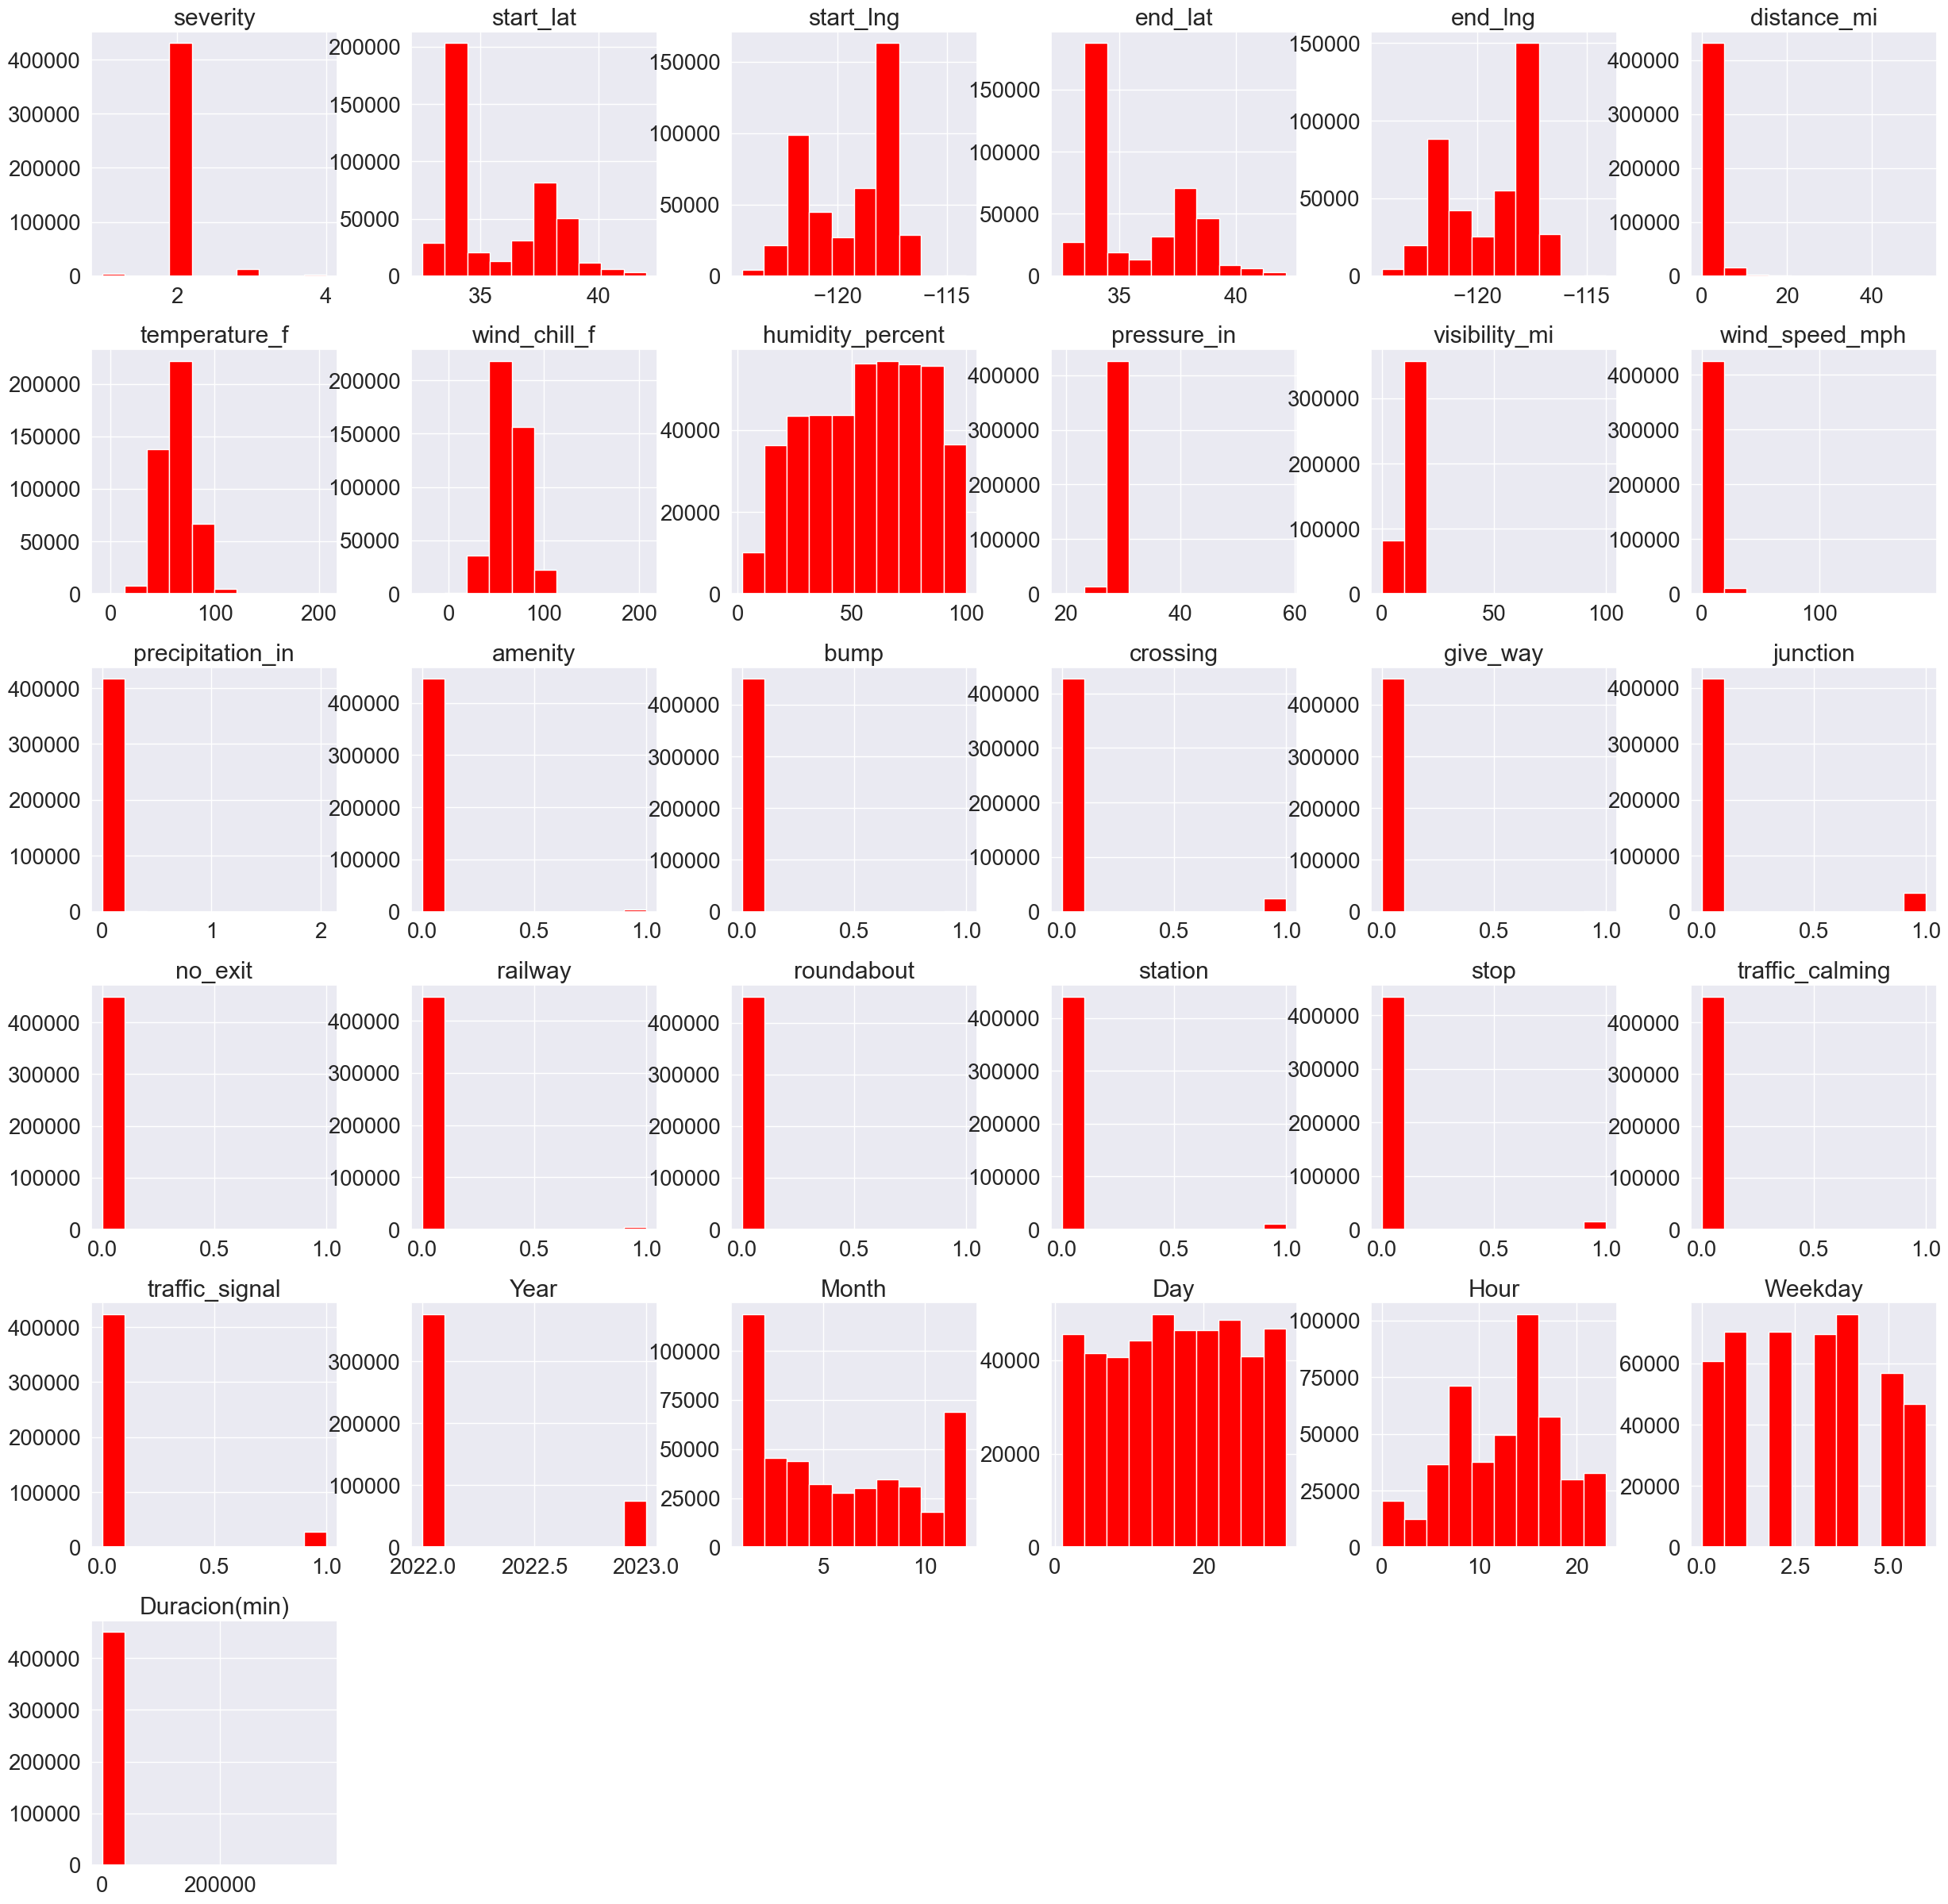

In [18]:
sns.set(font_scale=1.8)
df.iloc[: , 1:].hist(figsize = (30,30), color = 'red');

Se remueven las siguientes columnas:
- Wind chill porque ya hay temperatura.
- Presion debido a que no es de relevancia para la ocurrencia de accidentes.
- Velocidad del viento ya que no influye ya que son accidentes de transito, no aereos.
- Amenitie(comodidades) ya que no se considera que tenga incidencia en los datos, además esta desbalanceada.
- Railway ya que se encuentra desbalanceada y de acuerdo al criterio del ejercicio no resulta relevante.
- Roundabout
- Station ya que en estados unidos las stations estan aparte de las vias, calles, etc.


In [19]:
df.drop(['id', 'source', 'wind_chill_f', 'pressure_in',
       'wind_speed_mph', 'amenity', 'railway',
       'roundabout', 'station'],axis=1,inplace=True)

Se revisarán las columnas numericas para quitar aquellas que no sean relevantes.





In [20]:
non_numeric_columns = df.select_dtypes(exclude='number')
print(non_numeric_columns.columns)

Index(['description', 'street', 'city', 'county', 'zipcode', 'timezone',
       'airport_code', 'weather_timestamp', 'wind_direction',
       'weather_condition', 'sunrise_sunset', 'civil_twilight',
       'nautical_twilight', 'astronomical_twilight'],
      dtype='object')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450472 entries, 175167 to 1111239
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   severity               450472 non-null  float64 
 1   start_lat              450472 non-null  float16 
 2   start_lng              450472 non-null  float16 
 3   end_lat                413496 non-null  float16 
 4   end_lng                413496 non-null  float16 
 5   distance_mi            450472 non-null  float16 
 6   description            450472 non-null  category
 7   street                 448762 non-null  category
 8   city                   450469 non-null  category
 9   county                 450472 non-null  category
 10  zipcode                450335 non-null  category
 11  timezone               450335 non-null  category
 12  airport_code           449467 non-null  category
 13  weather_timestamp      440786 non-null  category
 14  temperature_f 

In [22]:
unique_values = {}

for column in ['description', 'street', 'city', 'county',
       'zipcode', 'timezone', 'airport_code', 'weather_timestamp',
       'wind_direction', 'weather_condition', 'sunrise_sunset',
       'civil_twilight', 'nautical_twilight', 'astronomical_twilight']:
    unique_values[column] = df[column].unique()

unique_values

{'description': ['Crash on CA-138 Pearblossom Hwy at 96th St.', 'Crash on US-101 Southbound before Exit 44 Moo..., '#1 lane blocked due to crash on I-5 Northboun..., 'HOV lane blocked due to crash on CA-57 Southb..., 'Crash on Valley View Ave at I-5.', ..., 'Incident on I-5 SB near HYPERION AVE Drive wi..., 'Incident on BARNEY WAY near DOROTHY WAY Expec..., 'Accident on CA-12 from Sonoma Hwy (Napa St/CA..., 'Accident from Colony Rd to Anahvac Ln.', 'Incident on VAN BUREN BLVD near HOUSE 17050 D...]
 Length: 245361
 Categories (3761578, object): [' 1039 GOLDEN BEAR - BOT', ' 1183 1125 IN IS 219/DALE START PD', ' 1183 1182 1125', ' 1183 ONE PTY HBD START PD JSO MAK RD', ..., ' The left lane is closed in both directions n..., ' The road is closed at Exit 60 (Dale Earnhard..., ' Two right lanes closed.', ' VEHICLE CRASH I77 SB NEAR LAKEVIEW ROAD THAT...],
 'street': ['Pearblossom Hwy', 'US-101', 'I-5', 'CA-57', 'Firestone Blvd', ..., ' Cowley Way', 'Estudillo Ave', 'Shotgun Creek Dr', 'Bel

In [23]:
weather_bins = {
    'Clear': ['Clear', 'Fair'],
    'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'],
    'Rainy': ['Light Rain', 'Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Heavy Rain', 'Light Freezing Rain', 'Drizzle', 'Light Freezing Fog', 'Light Rain Showers', 'Showers in the Vicinity', 'T-Storm', 'Thunder', 'Patches of Fog', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Snow', 'Rain / Windy', 'Heavy Rain / Windy', 'Squalls', 'Heavy Ice Pellets', 'Thunder / Windy', 'Drizzle and Fog', 'T-Storm / Windy', 'Smoke / Windy', 'Haze / Windy', 'Light Drizzle / Windy', 'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy', 'Light Snow with Thunder', 'Fog / Windy', 'Snow and Thunder', 'Sleet / Windy', 'Heavy Freezing Rain / Windy', 'Squalls / Windy', 'Light Rain Shower / Windy', 'Snow and Thunder / Windy', 'Light Sleet / Windy', 'Sand / Dust Whirlwinds', 'Mist / Windy', 'Drizzle / Windy', 'Duststorm', 'Sand / Dust Whirls Nearby', 'Thunder and Hail', 'Freezing Rain / Windy', 'Light Snow Shower / Windy', 'Partial Fog', 'Thunder / Wintry Mix / Windy', 'Patches of Fog / Windy', 'Rain and Sleet', 'Light Snow Grains', 'Partial Fog / Windy', 'Sand / Dust Whirlwinds / Windy', 'Heavy Snow with Thunder', 'Heavy Blowing Snow', 'Low Drifting Snow', 'Light Hail', 'Light Thunderstorm', 'Heavy Freezing Drizzle', 'Light Blowing Snow', 'Thunderstorms and Snow', 'Heavy Rain Showers', 'Rain Shower / Windy', 'Sleet and Thunder', 'Heavy Sleet and Thunder', 'Drifting Snow / Windy', 'Shallow Fog / Windy', 'Thunder and Hail / Windy', 'Heavy Sleet / Windy', 'Sand / Windy', 'Heavy Rain Shower / Windy', 'Blowing Snow Nearby', 'Blowing Sand', 'Heavy Rain Shower', 'Drifting Snow', 'Heavy Thunderstorms with Small Hail'],
    'Snowy': ['Light Snow', 'Snow', 'Light Snow / Windy', 'Snow Grains', 'Snow Showers', 'Snow / Windy', 'Light Snow and Sleet', 'Snow and Sleet', 'Light Snow and Sleet / Windy', 'Snow and Sleet / Windy'],
    'Windy': ['Blowing Dust / Windy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'T-Storm / Windy', 'Blowing Snow / Windy', 'Freezing Rain / Windy', 'Light Snow and Sleet / Windy', 'Sleet and Thunder / Windy', 'Blowing Snow Nearby', 'Heavy Rain Shower / Windy'],
    'Hail': ['Hail'],
    'Volcanic Ash': ['Volcanic Ash'],
    'Tornado': ['Tornado']
}

def map_weather_to_bins(weather):
    for bin_name, bin_values in weather_bins.items():
        if weather in bin_values:
            return bin_name
    return 'Other' 

df['weather_condition'] = df['weather_condition'].apply(map_weather_to_bins)
df['weather_condition']

175167      Clear
175168      Clear
175169      Clear
175170      Clear
175171      Clear
            ...  
1111235     Clear
1111236     Clear
1111237     Clear
1111238    Cloudy
1111239     Clear
Name: weather_condition, Length: 450472, dtype: object

In [24]:
df['weather_condition'].unique()

array(['Clear', 'Other', 'Cloudy', 'Rainy', nan, 'Windy', 'Snowy', 'Hail'],
      dtype=object)

In [25]:
df = df[df['weather_condition'].notna()]

In [26]:
df['weather_condition'].unique()

array(['Clear', 'Other', 'Cloudy', 'Rainy', 'Windy', 'Snowy', 'Hail'],
      dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439656 entries, 175167 to 1111239
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   severity               439656 non-null  float64 
 1   start_lat              439656 non-null  float16 
 2   start_lng              439656 non-null  float16 
 3   end_lat                403285 non-null  float16 
 4   end_lng                403285 non-null  float16 
 5   distance_mi            439656 non-null  float16 
 6   description            439656 non-null  category
 7   street                 437966 non-null  category
 8   city                   439653 non-null  category
 9   county                 439656 non-null  category
 10  zipcode                439656 non-null  category
 11  timezone               439656 non-null  category
 12  airport_code           439656 non-null  category
 13  weather_timestamp      439656 non-null  category
 14  temperature_f 

Se removeran las siguientes columnas: 
- Descripcion, ya que no es de relevancia para el modelo conocer textualmente que ocurrio en el accidente.
- Street ya que se analizara son los accidentes por estado.
- City ya que se analizara son los accidentes por estado.
- County ya que se analizara son los accidentes por estado.
- Zipcode debido a que ya se tiene el desglose de estados.
- Timezone debido a que se cuentan con las horas donde ocurrieron los accidentes.
- Airport code ya que se analizara son los accidentes por estado.
- Weather timestamp debido a que se ya se cuentan con variables numericas relacionadas al clima. 
- Wind direction debido a que se ya se cuentan con variables numericas relacionadas al clima
- Weather_condition debido a que se ya se cuentan con variables numericas relacionadas al clima
- Nautical_twilight debido a que se cuentan con las horas donde ocurrieron los accidentes.
- Astronomical_twilight debido a que se cuentan con las horas donde ocurrieron los accidentes.


In [28]:
df.drop(['description', 'street', 'city', 'county', 
       'zipcode', 'timezone', 'airport_code', 'weather_timestamp',
       'wind_direction', 'sunrise_sunset',
       'civil_twilight', 'nautical_twilight', 'astronomical_twilight','end_lat','end_lng'],axis=1,inplace=True)

In [29]:
non_numeric_columns = df.select_dtypes(exclude='number')
print(non_numeric_columns.columns)

Index(['weather_condition'], dtype='object')


Se procede a analizar los valores faltantes en el dataframe.

In [30]:
df.isnull().sum()

severity                 0
start_lat                0
start_lng                0
distance_mi              0
temperature_f         1626
humidity_percent      2066
visibility_mi         1275
precipitation_in     22961
weather_condition        0
bump                     0
crossing                 0
give_way                 0
junction                 0
no_exit                  0
stop                     0
traffic_calming          0
traffic_signal           0
Year                     0
Month                    0
Day                      0
Hour                     0
Weekday                  0
Duracion(min)            0
dtype: int64

In [31]:
(df.isnull().sum()/(len(df)))*100

severity             0.000000
start_lat            0.000000
start_lng            0.000000
distance_mi          0.000000
temperature_f        0.369835
humidity_percent     0.469913
visibility_mi        0.289999
precipitation_in     5.222492
weather_condition    0.000000
bump                 0.000000
crossing             0.000000
give_way             0.000000
junction             0.000000
no_exit              0.000000
stop                 0.000000
traffic_calming      0.000000
traffic_signal       0.000000
Year                 0.000000
Month                0.000000
Day                  0.000000
Hour                 0.000000
Weekday              0.000000
Duracion(min)        0.000000
dtype: float64

In [32]:
df_x = df

In [33]:
#Se procede a imputar los valores faltantes.

from sklearn.impute import SimpleImputer
numeric_cols = df.select_dtypes(include='number').columns
non_numeric_cols = df.select_dtypes(exclude='number').columns
df_copy = df.copy()
imputer = SimpleImputer(strategy='median')
df_copy[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [34]:
df_copy.isnull().sum()

severity             0
start_lat            0
start_lng            0
distance_mi          0
temperature_f        0
humidity_percent     0
visibility_mi        0
precipitation_in     0
weather_condition    0
bump                 0
crossing             0
give_way             0
junction             0
no_exit              0
stop                 0
traffic_calming      0
traffic_signal       0
Year                 0
Month                0
Day                  0
Hour                 0
Weekday              0
Duracion(min)        0
dtype: int64

In [35]:
df = df_copy

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439656 entries, 175167 to 1111239
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   severity           439656 non-null  float64
 1   start_lat          439656 non-null  float64
 2   start_lng          439656 non-null  float64
 3   distance_mi        439656 non-null  float64
 4   temperature_f      439656 non-null  float64
 5   humidity_percent   439656 non-null  float64
 6   visibility_mi      439656 non-null  float64
 7   precipitation_in   439656 non-null  float64
 8   weather_condition  439656 non-null  object 
 9   bump               439656 non-null  float64
 10  crossing           439656 non-null  float64
 11  give_way           439656 non-null  float64
 12  junction           439656 non-null  float64
 13  no_exit            439656 non-null  float64
 14  stop               439656 non-null  float64
 15  traffic_calming    439656 non-null  float64
 

In [37]:
# Se comprueba que no hayan valores faltantes tras la imputacion con mediana
df.isnull().sum()

severity             0
start_lat            0
start_lng            0
distance_mi          0
temperature_f        0
humidity_percent     0
visibility_mi        0
precipitation_in     0
weather_condition    0
bump                 0
crossing             0
give_way             0
junction             0
no_exit              0
stop                 0
traffic_calming      0
traffic_signal       0
Year                 0
Month                0
Day                  0
Hour                 0
Weekday              0
Duracion(min)        0
dtype: int64

In [38]:
#Número de observaciones, media, desviación estándar, mínimo, máximo, cuartiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
severity,439656.0,2.030376,0.249111,1.00000,2.000000,2.000000,2.000000,4.000000
start_lat,439656.0,35.686467,2.138168,32.53125,33.968750,34.312500,37.718750,42.000000
start_lng,439656.0,-119.489651,1.917834,-124.37500,-121.437500,-118.500000,-117.875000,-114.187500
distance_mi,439656.0,1.028797,2.089740,0.00000,0.061005,0.287109,1.023438,52.625000
temperature_f,439656.0,63.308271,14.538770,-8.00000,54.000000,62.000000,72.000000,207.000000
humidity_percent,439656.0,56.564232,24.884998,2.00000,36.000000,58.000000,77.000000,100.000000
visibility_mi,439656.0,9.205721,2.367106,0.00000,10.000000,10.000000,10.000000,100.000000
precipitation_in,439656.0,0.003086,0.022916,0.00000,0.000000,0.000000,0.000000,2.050781
bump,439656.0,0.000812,0.028484,0.00000,0.000000,0.000000,0.000000,1.000000
crossing,439656.0,0.053094,0.224221,0.00000,0.000000,0.000000,0.000000,1.000000


In [39]:
numeric_cols = df.select_dtypes(include='number').columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Asegúrate de que todas las columnas sean numéricas

df_new = df[numeric_cols]
df_new= df_new.drop(["severity"],axis=1)
# Handle NaN, inf, and -inf values
df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

# Exclude the constant column when displaying VIF values
vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

             feature       VIF
0          start_lat  7.252170
1          start_lng  7.252008
2        distance_mi  1.033266
3      temperature_f  2.125039
4   humidity_percent  2.204569
5      visibility_mi  1.263970
6   precipitation_in  1.112444
7               bump  3.517496
8           crossing  1.286194
9           give_way  1.007186
10          junction  1.014205
11           no_exit  1.001283
12              stop  1.051820
13   traffic_calming  3.525106
14    traffic_signal  1.246017
15              Year  1.473936
16             Month  1.463455
17               Day  1.017238
18              Hour  1.091318
19           Weekday  1.004746
20     Duracion(min)  1.001424


In [40]:
df_new= df_new.drop(["start_lat"],axis=1)
# Calculate VIF
X = df_new.assign(const=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(df_new.shape[1])]

# Exclude the constant column when displaying VIF values
vif_data = vif_data[vif_data["feature"] != "const"]

print(vif_data)

             feature       VIF
0          start_lng  1.068457
1        distance_mi  1.032660
2      temperature_f  2.053672
3   humidity_percent  2.072190
4      visibility_mi  1.253277
5   precipitation_in  1.112417
6               bump  3.517475
7           crossing  1.285055
8           give_way  1.007082
9           junction  1.009688
10           no_exit  1.001142
11              stop  1.051745
12   traffic_calming  3.524458
13    traffic_signal  1.244248
14              Year  1.473367
15             Month  1.451134
16               Day  1.017200
17              Hour  1.091260
18           Weekday  1.004687
19     Duracion(min)  1.001423


In [41]:
df.drop(["start_lat"],axis=1,inplace=True)

In [42]:
df.isnull().sum()

severity             0
start_lng            0
distance_mi          0
temperature_f        0
humidity_percent     0
visibility_mi        0
precipitation_in     0
weather_condition    0
bump                 0
crossing             0
give_way             0
junction             0
no_exit              0
stop                 0
traffic_calming      0
traffic_signal       0
Year                 0
Month                0
Day                  0
Hour                 0
Weekday              0
Duracion(min)        0
dtype: int64

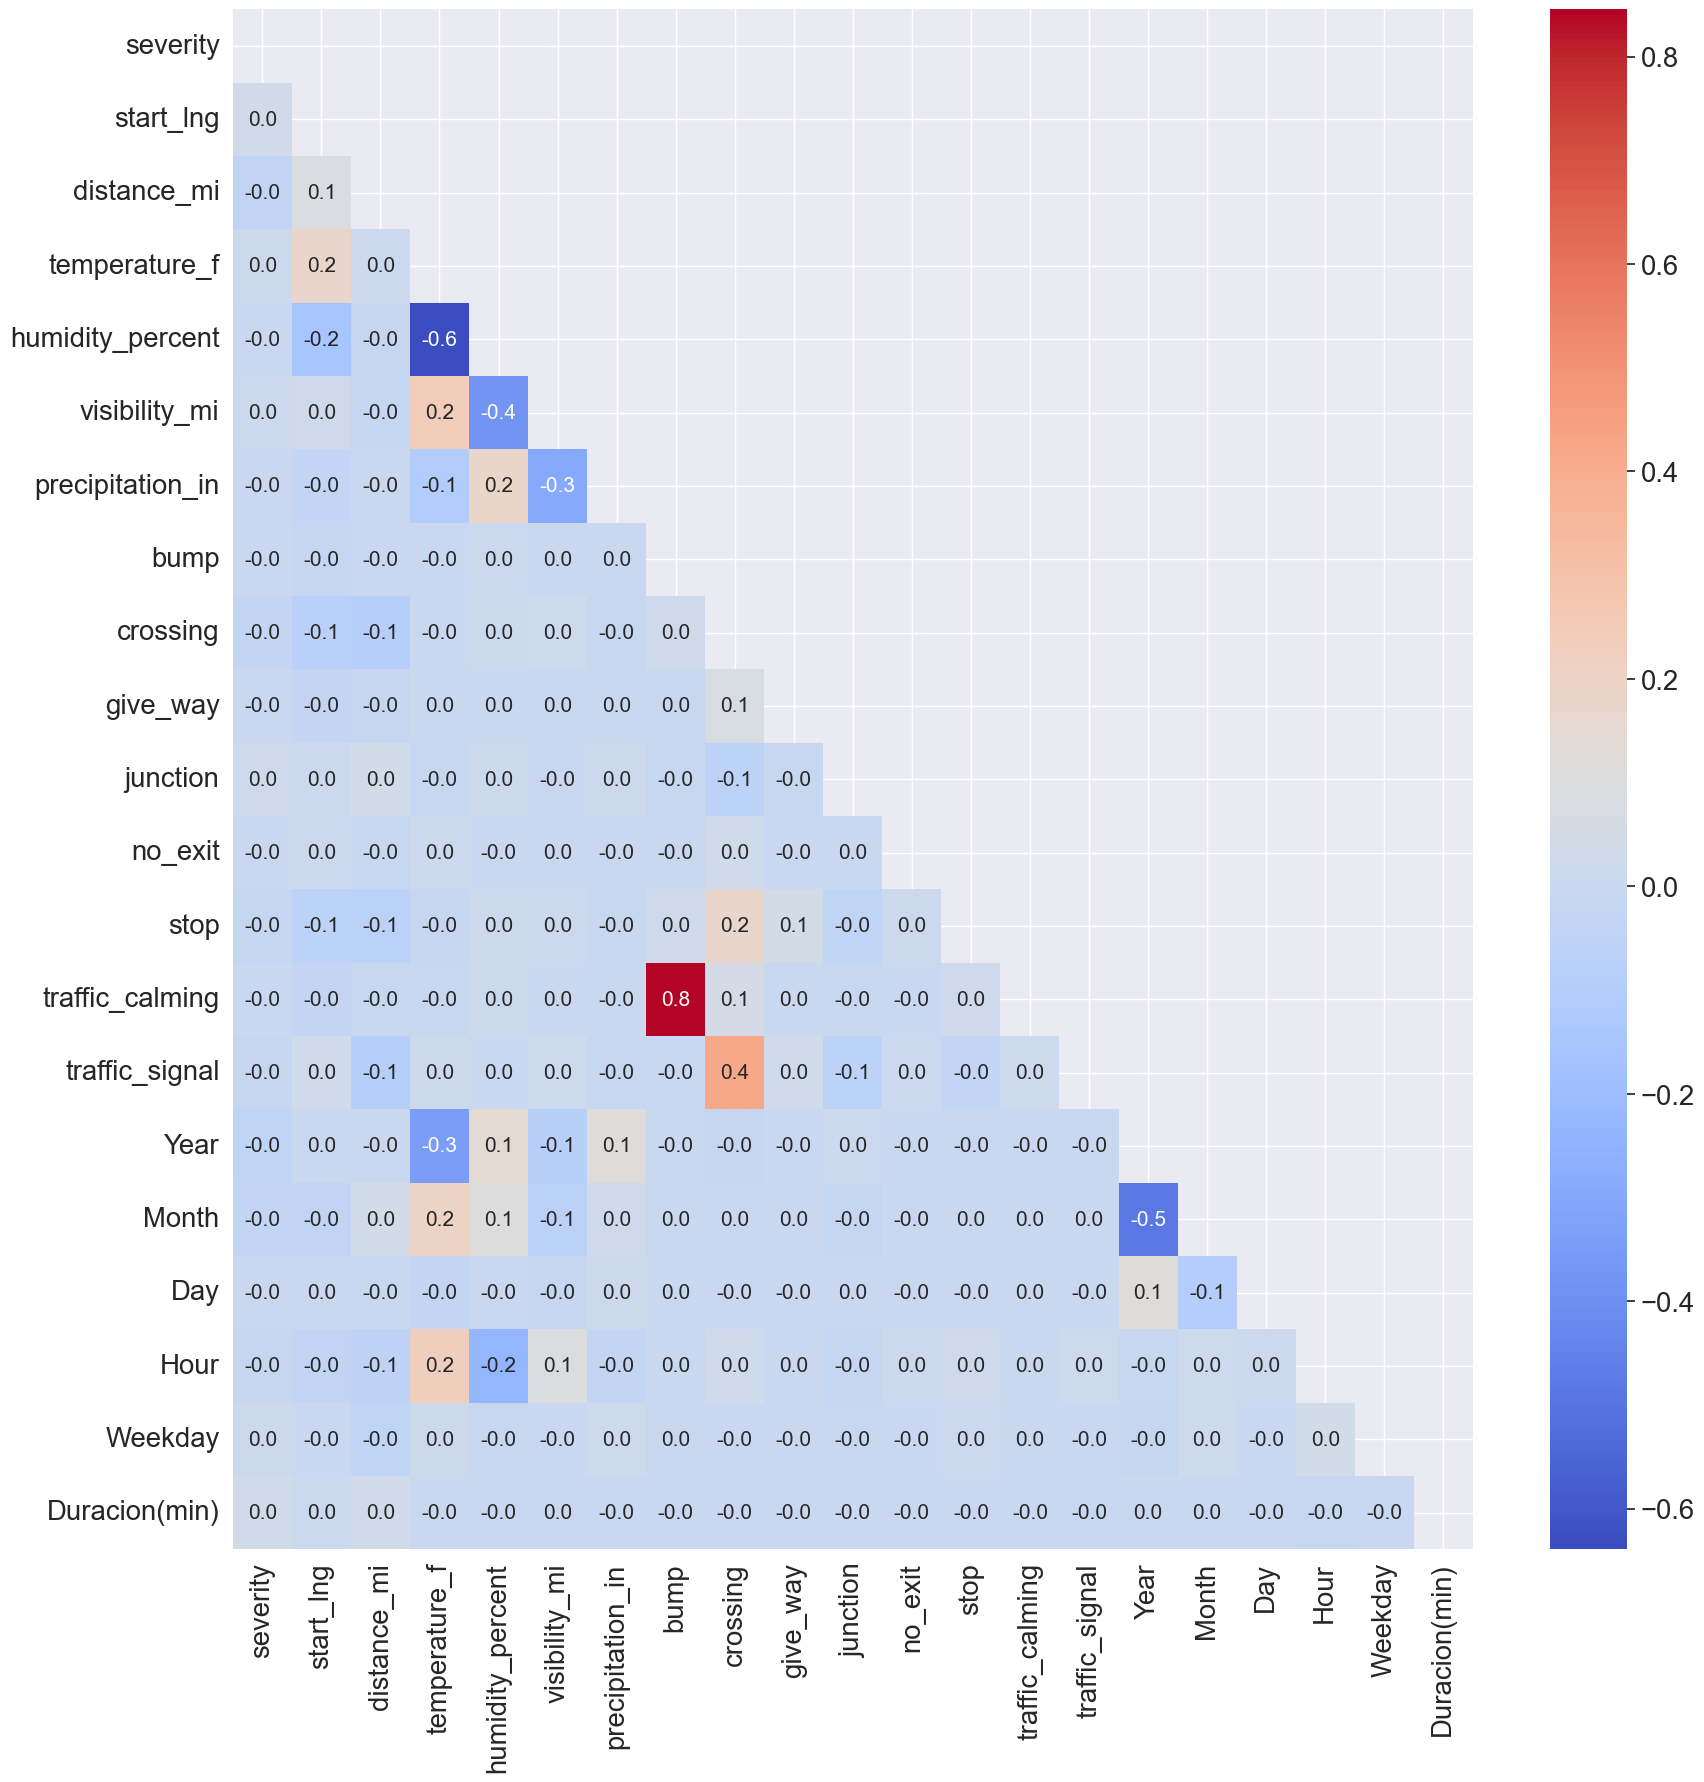

In [43]:
corr_matrix = df.select_dtypes(include=['number']).corr()
import numpy as np
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))   
sns.heatmap(corr_matrix, mask=mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='coolwarm');

In [44]:
df.drop(["traffic_calming"],inplace=True,axis=1)

Se realizara onehot encoding ya que los modelos solo trabajan con variables numericas

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439656 entries, 175167 to 1111239
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   severity           439656 non-null  float64
 1   start_lng          439656 non-null  float64
 2   distance_mi        439656 non-null  float64
 3   temperature_f      439656 non-null  float64
 4   humidity_percent   439656 non-null  float64
 5   visibility_mi      439656 non-null  float64
 6   precipitation_in   439656 non-null  float64
 7   weather_condition  439656 non-null  object 
 8   bump               439656 non-null  float64
 9   crossing           439656 non-null  float64
 10  give_way           439656 non-null  float64
 11  junction           439656 non-null  float64
 12  no_exit            439656 non-null  float64
 13  stop               439656 non-null  float64
 14  traffic_signal     439656 non-null  float64
 15  Year               439656 non-null  float64
 

In [46]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop=None)
state_encoded = encoder.fit_transform(df[['weather_condition']])
encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['weather_condition']))

# Resetting the index before concatenation
df_dropped = df.drop('weather_condition', axis=1).reset_index(drop=True)
df_encoded = pd.concat([df_dropped, encoded_df], axis=1)


c:\Users\danie\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439656 entries, 0 to 439655
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   severity                  439656 non-null  float64
 1   start_lng                 439656 non-null  float64
 2   distance_mi               439656 non-null  float64
 3   temperature_f             439656 non-null  float64
 4   humidity_percent          439656 non-null  float64
 5   visibility_mi             439656 non-null  float64
 6   precipitation_in          439656 non-null  float64
 7   bump                      439656 non-null  float64
 8   crossing                  439656 non-null  float64
 9   give_way                  439656 non-null  float64
 10  junction                  439656 non-null  float64
 11  no_exit                   439656 non-null  float64
 12  stop                      439656 non-null  float64
 13  traffic_signal            439656 non-null  f

In [48]:
df_encoded.isnull().sum()

severity                    0
start_lng                   0
distance_mi                 0
temperature_f               0
humidity_percent            0
visibility_mi               0
precipitation_in            0
bump                        0
crossing                    0
give_way                    0
junction                    0
no_exit                     0
stop                        0
traffic_signal              0
Year                        0
Month                       0
Day                         0
Hour                        0
Weekday                     0
Duracion(min)               0
weather_condition_Clear     0
weather_condition_Cloudy    0
weather_condition_Hail      0
weather_condition_Other     0
weather_condition_Rainy     0
weather_condition_Snowy     0
weather_condition_Windy     0
dtype: int64

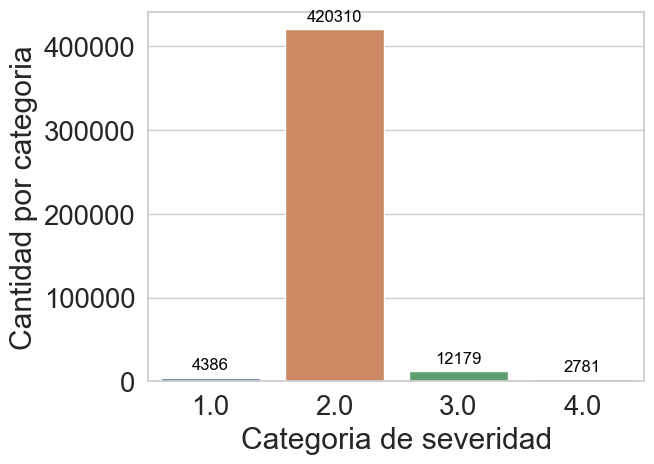

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style("whitegrid")
ax = sns.countplot(data=df_encoded,x="severity")
plt.xlabel("Categoria de severidad")
plt.ylabel("Cantidad por categoria")
def annotate_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 9), 
                    textcoords='offset points')
annotate_counts(ax)


In [50]:
nan_counts = df_encoded.isna().sum()
nan_counts

severity                    0
start_lng                   0
distance_mi                 0
temperature_f               0
humidity_percent            0
visibility_mi               0
precipitation_in            0
bump                        0
crossing                    0
give_way                    0
junction                    0
no_exit                     0
stop                        0
traffic_signal              0
Year                        0
Month                       0
Day                         0
Hour                        0
Weekday                     0
Duracion(min)               0
weather_condition_Clear     0
weather_condition_Cloudy    0
weather_condition_Hail      0
weather_condition_Other     0
weather_condition_Rainy     0
weather_condition_Snowy     0
weather_condition_Windy     0
dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
#Se define X y y

X = df_encoded.drop(columns=['severity'])
y = df_encoded['severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [53]:
from sklearn.utils import resample
# Assuming you've already done the SMOTE resampling
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Reduce the dataset size by sampling
sample_size = int(0.01 * len(X_resampled))  # using 50% of the resampled data
X_sampled, y_sampled = resample(X_resampled, y_resampled, n_samples=sample_size, random_state=42, stratify=y_resampled)


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
standard =StandardScaler()
X_resampled= standard.fit_transform(X_resampled)
X_test = standard.transform(X_test)

In [64]:

# 1. Define the preprocessing steps
preprocessing = Pipeline([
    ('scaler', StandardScaler())
])

# 2. Create a pipeline for each classifier
pipeline_log = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000))
])

pipeline_tree = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', DecisionTreeClassifier())
])

pipeline_svm = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', SVC(gamma='scale'))
])

# Parameter grids (with modified names to work with the pipeline)
param_grid_log = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

param_grid_tree = {
    'classifier__max_depth': [5, 10, 15, 20]
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 1, 10]
}

# 3. Use the pipeline in GridSearchCV
grid_log = GridSearchCV(pipeline_log, param_grid_log, cv=5, scoring="recall")
grid_log.fit(X_resampled, y_resampled)

grid_tree = GridSearchCV(pipeline_tree, param_grid_tree, cv=5, scoring="recall")
grid_tree.fit(X_resampled, y_resampled)

grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring="recall")
grid_svm.fit(X_resampled, y_resampled)

# 4. Utilize the best parameters for each model
best_log = grid_log.best_estimator_
best_tree = grid_tree.best_estimator_
best_svm = grid_svm.best_estimator_

# 5. Combine in the VotingClassifier
voting = VotingClassifier(estimators=[('Logistic', best_log), ('Tree', best_tree), ('SVM', best_svm)], voting="soft")
voting.fit(X_resampled, y_resampled)


In [ ]:
# Precisión en el conjunto de entrenamiento
train_score = voting.score(X_resampled, y_resampled)
print(f"Precisión en el conjunto de entrenamiento: {train_score:.2f}")

# Precisión en el conjunto de test
test_score = voting.score(X_test, y_test)
print(f"Precisión en el conjunto de test: {test_score:.2f}")